In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from plot import vaccination_rate_plot
pd.set_option("display.max_columns", 100)

In [2]:
features_df = pd.read_csv(
    "training_set_features.csv", 
    index_col="respondent_id"
)
labels_df = pd.read_csv(
    "training_set_labels.csv", 
    index_col="respondent_id"
)

In [3]:
import matplotlib.pyplot as plt

In [4]:
joined_df = features_df.join(labels_df)


In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_SEED = 6    # Set a random seed for reproducibility!
from sklearn import preprocessing
from dirty_cat import SuperVectorizer
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.preprocessing import MultiLabelBinarizer


In [81]:
estimators = MultiOutputClassifier(
    estimator= xgb.XGBClassifier(objective="multi:softprob", random_state=RANDOM_SEED,num_class = 2,learning_rate= 0.01, n_estimators=300, min_child_weight= 10,gamma= 0.1, maxdepth= 3, subsample= 0.6)
)

In [82]:
preprocessor = SuperVectorizer()
#estimators = MultiOutputClassifier(
#    estimator=LogisticRegression(penalty="l2", C=1)
#)
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ('simple_imputer', SimpleImputer(strategy='mean')),
    ("estimators", estimators),
])
full_pipeline

Pipeline(steps=[('preprocessor', SuperVectorizer()),
                ('simple_imputer', SimpleImputer()),
                ('estimators',
                 MultiOutputClassifier(estimator=XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               early_stopping_rounds=None,
                                                               enable_categorical=False,
                                                               eval_metric=None,
                                                               gamma=0.1,
                                                               gpu_id=None,
                                                               gr...olicy=None,
                                                               importance_type=None,
                                                               interaction_constraints=None,
                                                               learning_rate=0.01,
                                                               max_bin=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               maxdepth=3,
                                                               min_child_weight=10,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=300,
                                                               n_jobs=None,
                                                               num_class=2,
                                                               num_parallel_tree=None,
                                                               objective='multi:softprob',
                                                               predictor=None, ...)))])

In [83]:
X_train, X_eval, y_train, y_eval = train_test_split(
    features_df,
    labels_df,
    test_size=0.33,
    shuffle=True,
    stratify=labels_df,
    random_state=RANDOM_SEED
)

In [84]:
# Train model
full_pipeline.fit(X_train, y_train)
preds = full_pipeline.predict_proba(X_eval)
preds

[03:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "maxdepth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:13:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "maxdepth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[array([[0.5844594 , 0.41554055],
        [0.9337537 , 0.06624634],
        [0.9379419 , 0.06205809],
        ...,
        [0.9425168 , 0.05748316],
        [0.894015  , 0.10598502],
        [0.90075994, 0.0992401 ]], dtype=float32),
 array([[0.34385875, 0.6561412 ],
        [0.5222497 , 0.47775027],
        [0.42334825, 0.57665175],
        ...,
        [0.82642454, 0.17357545],
        [0.81901306, 0.18098694],
        [0.08327418, 0.9167258 ]], dtype=float32)]

In [85]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6728,0.415541,0.656141
16516,0.066246,0.477750
3106,0.062058,0.576652
16981,0.816138,0.919653
19111,0.100789,0.729913


In [86]:
full_pipeline.score(X_train, y_train)

ValueError: Unable to coerce to Series/DataFrame, dimension must be <= 2: (2, 17893, 2)

In [92]:
roc_auc_score(y_eval, y_preds)


0.8622271453237641

In [93]:
full_pipeline.fit(features_df, labels_df)

[04:58:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "maxdepth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:58:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "maxdepth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Pipeline(steps=[('preprocessor', SuperVectorizer()),
                ('simple_imputer', SimpleImputer()),
                ('estimators',
                 MultiOutputClassifier(estimator=XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               early_stopping_rounds=None,
                                                               enable_categorical=False,
                                                               eval_metric=None,
                                                               gamma=0.1,
                                                               gpu_id=None,
                                                               gr...olicy=None,
                                                               importance_type=None,
                                                               interaction_constraints=None,
                                                               learning_rate=0.01,
                                                               max_bin=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               maxdepth=3,
                                                               min_child_weight=10,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=300,
                                                               n_jobs=None,
                                                               num_class=2,
                                                               num_parallel_tree=None,
                                                               objective='multi:softprob',
                                                               predictor=None, ...)))])

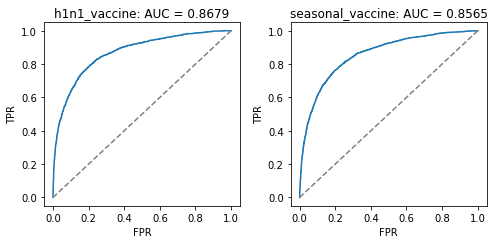

In [91]:
from plot import plot_roc
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [89]:
test_features_df = pd.read_csv("test_set_features.csv", 
                               index_col="respondent_id")
test_probas = full_pipeline.predict_proba(test_features_df)
test_probas

[array([[0.8032054 , 0.19679457],
        [0.9401913 , 0.05980868],
        [0.8057947 , 0.19420533],
        ...,
        [0.7757085 , 0.22429149],
        [0.9448258 , 0.05517418],
        [0.33242726, 0.66757274]], dtype=float32),
 array([[0.75823504, 0.241765  ],
        [0.91692615, 0.08307384],
        [0.32366937, 0.6763306 ],
        ...,
        [0.7502987 , 0.24970129],
        [0.67860484, 0.32139516],
        [0.31116968, 0.6888303 ]], dtype=float32)]

In [90]:
submission_df = pd.read_csv("submission_format.csv", 
                            index_col="respondent_id")
np.testing.assert_array_equal(test_features_df.index.values, 
                              submission_df.index.values)
submission_df["h1n1_vaccine"] = test_probas[0][:, 1]
submission_df["seasonal_vaccine"] = test_probas[1][:, 1]

submission_df.head()


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.196795,0.241765
26708,0.059809,0.083074
26709,0.194205,0.676331
26710,0.672349,0.887278
26711,0.370567,0.565192


In [56]:
submission_df.to_csv('my_submission_xgboost.csv', index=True)